In [1]:
import pandas as pd
import json
import  numpy as np
import matplotlib.pyplot as plt
import geopandas

df1 = geopandas.read_file('NDVI_at_sample.geojson')
df1.head()
df2 = geopandas.read_file('sampled_points.geojson')
df2.head()
# Merge df1, df2 using id
df3 = df1.merge(df2, on='id')
df3 = df3.drop(['id', 'geometry_x'], axis=1)
df3.head()

# Rename geometry_y to geometry
df3 = df3.rename(columns={'geometry_y': 'geometry'})
df3 = df3.rename(columns={'remapped': 'clustered_label'})

# Put x coordinates of the POINTS type into the x column
df3['x'] = df3['geometry'].apply(lambda p: p.x)
df3['y'] = df3['geometry'].apply(lambda p: p.y)

df3 = df3.drop(['geometry'], axis=1)
print(df3.shape)
df4 = df3.groupby(['clustered_label']).mean()
df5 = df4.drop(['x', 'y'], axis=1)
time_series = df5.values.tolist()


(30, 27)


In [2]:
print(time_series)

[[-0.00474705, 0.019732848, 0.018600054, -0.013157895, 0.006142844, 0.025546381, -0.009972575, 0.0048855515, 0.020574162, 0.03591954, -0.02725042, 0.024252146, 0.014373717, -0.030657833, 0.012088753, 0.01771807, 0.024945462, 0.01724138, -0.08842027, 0.003234977, 0.029188078, -0.003357693, -0.013030219, 0.057895787], [0.040037053687500004, 0.04433085275, 0.029948549625, 6.7241874999995205e-06, 0.026132958375, 0.020173009125000002, 0.01363596075, 0.027113745437499996, 0.0190100893375, 0.03033671675, 0.0046388800125, 0.020495119625, 0.03536259075, 0.00765691755, 0.03190780757, 0.025245892, 0.0230476281875, 0.01619233305, -0.015100544875, 0.022957123825000002, 0.02664003925, -0.0201732699125, 0.01567845575, 0.023289858675], [0.4323258033333333, 0.7216286900000001, 0.6548059366666666, 0.5431352766666667, 0.15791745666666668, 0.08250431333333334, 0.3721334766666667, 0.46628994666666673, 0.3270685566666667, 0.15577974, 0.13051417, 0.113642271, 0.22040915333333333, 0.37040976333333336, 0.32874

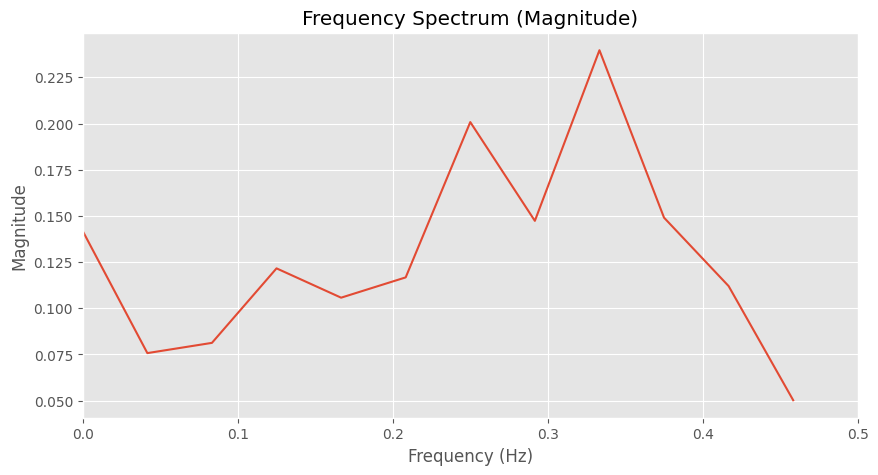

0.08126955273529887


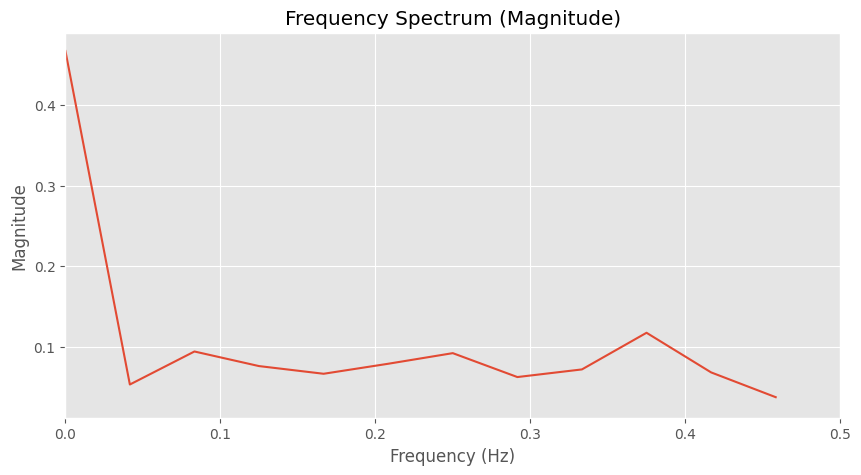

0.0939154404336517


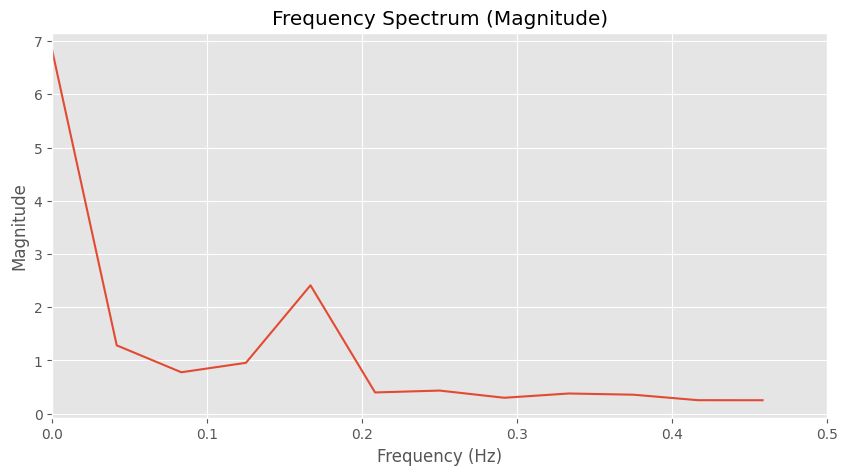

0.778209721176945


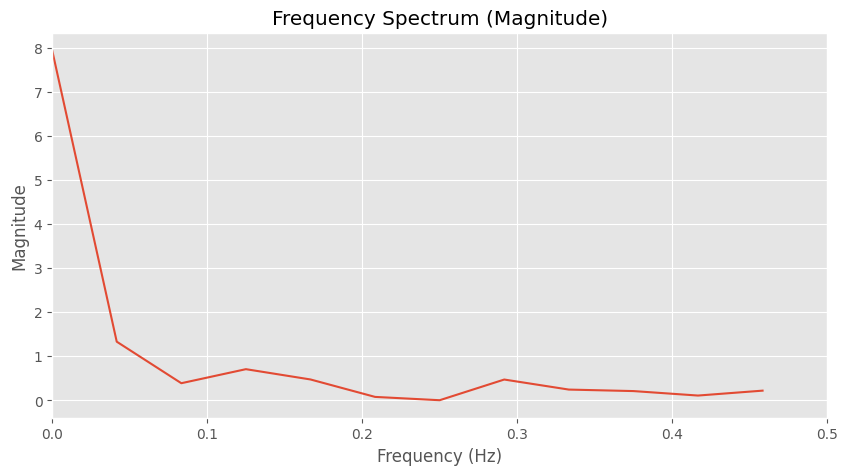

0.3903110954614872


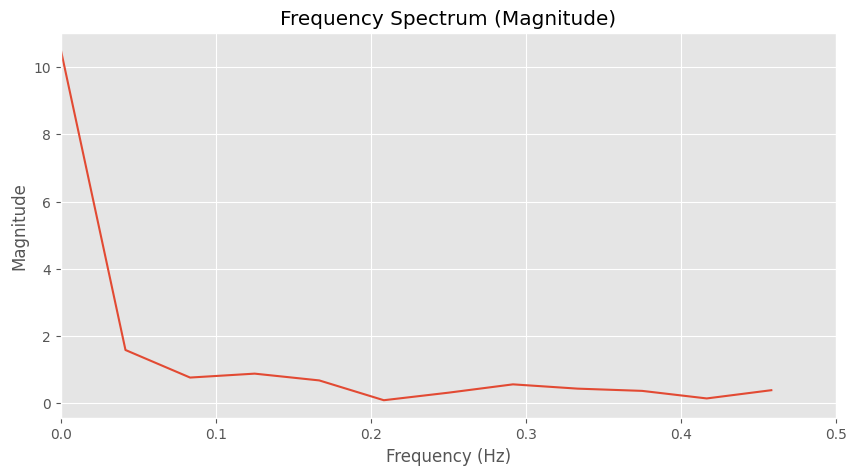

0.7665634403330053
[0, 0, 1, 0, 0]


In [3]:

tru = []
fs = 1.0  # Set your desired sampling frequency (e.g., 1 Hz)
dt = 1.0 / fs
sz = len(time_series)
freql = []

plt.style.use('ggplot')

for i in range(sz):
    N = len(time_series[i])
    fft_result = np.fft.fft(time_series[i])
    fft_result = np.fft.fftshift(fft_result)  # Shift the FFT result
    freq = np.fft.fftfreq(N, dt)
    freq = np.fft.fftshift(freq)  # Shift the frequency values

    # Plot the magnitude of the FFT result
    plt.figure(figsize=(10, 5))
    plt.plot(freq, np.abs(fft_result))
    plt.title("Frequency Spectrum (Magnitude)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    # plt.grid(True)
    plt.xlim(0, fs / 2)  # Plot both positive and negative frequencies
    plt.show()
    prev = 0
    ok = 0
    max = 0
    for j in range(len(freq)):
        if (freq[j] < .1 and freq[j+1] > .1):
            prev = np.abs(fft_result[j])
            print(prev)
        if(freq[j] > .1 and freq[j] < .2):
            print
            if(np.abs(fft_result[j]) > 2 * prev):
                ok = 1
                if (max < np.abs(fft_result[j])):
                    max = np.abs(fft_result[j])
        if(max < np.abs(fft_result[j]) and freq[j] != 0):
            ok = 0
    if (ok == 0):
        tru.append(0)
    else:
        tru.append(1)
            
print(tru)

In [4]:
counter_tot = 0
counter_farm = 0
for i in range(df3.shape[0]):
        counter_tot += 1
        counter_farm += tru[df3['clustered_label'][i]]

In [5]:
print("Percentage of farmland = ", round(counter_farm / counter_tot, 4) * 100, "%")

Percentage of farmland =  10.0 %


In [6]:
tru_vals = [i for i in range(len(tru)) if tru[i] == 1] 

# df3_farm should have all the points that have tru[cluster label] == 1
df3_farm = df3[df3['clustered_label'].isin(tru_vals)]
df3_farm.head()



,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,...,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,clustered_label,x,y
11,0.702864,0.688419,0.514849,0.416149,0.175452,0.121818,0.435245,0.421340,0.131732,0.116616,...,0.216286,0.419210,0.385650,0.208048,0.102278,0.163127,0.114374,2,101.120492,3.702155
13,0.439825,0.759717,0.723841,0.607251,0.135296,0.046308,0.463990,0.510461,0.435358,0.149542,...,0.084906,0.471869,0.465310,0.374326,0.072566,0.065829,0.020179,2,101.160071,3.482228
25,0.154289,0.716750,0.725727,0.606006,0.163004,0.079387,0.217166,0.467069,0.414116,0.201182,...,0.120203,0.207103,0.372383,0.448513,0.161091,0.202085,0.045867,2,101.017574,3.596570


In [8]:
#to measure crop quality



diffavg = 0;
# look through all the top
if len(tru_vals) > 1:
    #find region with highest avg foliage
    for i in range(len(tru_vals)):
        #difference bw highest and lowest value in timeseries
        diffavg += max(time_series[tru_vals[i]]) - min(time_series[tru_vals[i]])

    diffavg = diffavg / len(tru_vals)

    for i in range(len(tru_vals)):
        diff = max(time_series[tru_vals[i]]) - min(time_series[tru_vals[i]])
        if diff > diffavg:
            print("Region ", tru_vals[i], " has high crop quality")
        else:
            print("Region ", tru_vals[i], " has low crop quality")
    

